# Task proposal

Concepts and Application of Pythorch and various model architectures on different datasets.

Course: [The Ultimate Computer Vision and Deep Learning Course](https://www.udemy.com/course/the-ultimate-computer-vision-and-deep-learning-course/) (1 hour and 14 minutes)

# Section 2: Deep Learning Fundamentals

## Pytorch

Used in different fields, such as healthcare, finance and manufacturing, pytorch provides different benefits by being easy and quick to use.

Through dynamic computer graphics, it promotes flexibility and expressiveness in the construction of models.

## Tensor

Fundamental data structure for training neural network models. They have different sizes and shapes, compared to vectors and matrices, for example.

They are used in the construction of models, both in backpropagation and in the output itself.

### Tensor operations

In [ ]:
import torch

sample = torch.tensor([10, 11])
sample.shape

torch.Size([2])

In [ ]:
sample = torch.tensor([[10, 11], [3, 5]])
sample.shape

torch.Size([2, 2])

In [ ]:
sample = torch.tensor([[10], [3]])
sample.shape

torch.Size([2, 1])

In [ ]:
import torch
import plotly.graph_objs as go
import plotly.offline as pyo

# Creating three-dimensional vector
a = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# List of values
x_vals = []
y_vals = []
z_vals = []
for i in range(a.shape[0]):
     for j in range(a.shape[1]):
         for k in range(a.shape[2]):
             x_vals.append(i)
             y_vals.append(j)
             z_vals.append(k)

# Creating Plotly 3D scatter plot
trace = go.Scatter3d(
     x=x_vals,
     y=y_vals,
     z=z_vals,
     mode='markers',
     marker=dict(
         size=5,
         color=a.flatten(),
         colorscale='Viridis',
         opacity=0.8
     )
)

# plot layout
layout = go.Layout(
     margin=dict(l=0, r=0, b=0, t=0),
     scene=dict(
         xaxis=dict(title='Dimension 1'),
         yaxis=dict(title='Dimension 2'),
         zaxis=dict(title='Dimension 3')
     )
)

fig = go.Figure(data=[trace], layout=layout)
pyo.plot(fig, filename='tensor.html')

'tensor.html'

### Multiplication

In [ ]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
x*10

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])

### Add

In [ ]:
x.add(10)

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

### Reshape

#### View

In [ ]:
x

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [ ]:
x.view(4,2)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
x.view(8,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])

#### Squeeze

In [ ]:
a = torch.ones(2,1,10)

# tensor of 2 "stacks" with one row and 10 columns each, totaling 20 elements
a

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

In [ ]:
print(f"Before squeezing {a.shape}")
squeezed = a.squeeze(1)
print(f"After squeezing {squeezed.shape}")

Before squeezing torch.Size([2, 1, 10]) 
After squeezing torch.Size([2, 10]


#### Unsqueeze

In [ ]:
a = torch.ones(2,3)
print(f"This is the shape before squeezing {a.shape}")
squeezed = a.unsqueeze(2)
print(f"This is the shape after squeezing {squeezed.shape}")

This is the shape before squeezing torch.Size([2, 3])
This is the shape after squeezing torch.Size([2, 3, 1])


### Indexing [None]

In [ ]:
# Adding none would automatically create a fae dimension on the specified axis
print(a[None].shape) # False axis at index 0
print(a[:,None].shape) # False axis in 1 index
print(a[:,:,None].shape) # False axis at index 2

torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])


## Matrix

### Matrix multiplication

In [ ]:
x = torch.tensor([[1,2,3,4],[5,6,7,8]]) # shape = (2,4)
y = torch.tensor([[1,2,3],
                  [2,3,4],
                  [4,5,6],
                  [7,8,9]]) # shape = (4,3)

torch.matmul(x, y)

tensor([[ 45,  55,  65],
        [101, 127, 153]])

### Concatenation

In [ ]:
x = torch.randn(1,4,5)
z = torch.cat([x,x], axis=1)
print('Concatenation axis 1:', x.shape, z.shape)
# z tensor has form (1,8,5)

### Permutação

In [ ]:
x = torch.randn(3,20,10)
z = x.permute(2,0,1)
print('Permutation:', x.shape, z.shape)

## Advantages of pytorch tensors

* Optimized for deep learning;
* Use the GPU.
* Computer gradient
* Intuitive API

# Section 3: Building Neural Networks with PyTorch

Neural networks are used in different areas of society, and based on their structure, they have a great capacity for processing data and learning complex problems. The next part of the course shows how to build a neural network using pythorch.

## Network architecture

In [ ]:
!pip install torchviz

In [ ]:
import torch
from torchviz import make_dot

In [ ]:
# Input and output data
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [ ]:
# Transform them into tensors
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

If GPU is available, use it.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
X = X.to(device)
Y = Y.to(device)

In [ ]:
# nn = Neural Network
import torch.nn as nn

In [ ]:
class MyNeuralNet(nn.Module):
   def __init__(self):
     super().__init__() # Inherit
     self.layer1 = nn.Linear(2,8) # Linear layer
     self.activation = nn.ReLU() # Activation function
     self.layer2 = nn.Linear(8,1)

   # When something is passed through the model object, call the forward method
   def forward(self,x):
     x = self.layer1(x)
     x = self.activation(x)
     x = self.layer2(x)
     return x

In [ ]:
model = MyNeuralNet()

In [ ]:
# View neural network
make_dot(model(X), params=dict(model.named_parameters())).render("dense_network", format="png")

'dense_network.png'

Weight matrix

In [ ]:
model.layer1.weight

Parameter containing:
tensor([[ 0.0509, -0.3901],
        [ 0.3413,  0.5665],
        [ 0.5231, -0.4966],
        [-0.0810, -0.1150],
        [ 0.4289, -0.6640],
        [ 0.3901, -0.1870],
        [-0.4525,  0.4234],
        [ 0.2273,  0.1957]], requires_grad=True)

Parameters

In [ ]:
model.parameters().__next__()

Parameter containing:
tensor([[ 0.0509, -0.3901],
        [ 0.3413,  0.5665],
        [ 0.5231, -0.4966],
        [-0.0810, -0.1150],
        [ 0.4289, -0.6640],
        [ 0.3901, -0.1870],
        [-0.4525,  0.4234],
        [ 0.2273,  0.1957]], requires_grad=True)

## Loss and activation function

Activation function: responsible for mapping input to output.

Close function: measure network performance.

### Activation functions:

Sigmoid

In [ ]:
import math

# (1/(1+e^(-x)))
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

ReLU

In [ ]:
import torch

class ReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.max(torch.zeros_like(x), x)


### Loss functions:

MSE

In [ ]:
import numpy as np

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Cross entropy loss

In [ ]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

## Training neural network from scratch

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [ ]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    # When we call the super.__init__() method we ensure we are inhertiting
    super().__init__()
    self.layer1 = nn.Linear(2,8) # A linear layer
    self.activation = nn.ReLU() # activation function
    self.layer2 =  nn.Linear(8,1)

  # When we pass something through the model object, it calls the forward function
  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [ ]:
model = MyNeuralNet()
loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr = 0.001)

In [ ]:
losses = []
for _ in range(50): # Running for 50 epochs
   opt.zero_grad() # Zeroing the gradients before each epoch
   loss_value = loss_func(model(X),Y)
   # The gradients of the loss function with respect to all trainable parameters of the network are calculated and stored in the grad attribute of the corresponding tensors.
   loss_value.backward()

   # opt.step() is used to update the weights and biases of the neural network using the calculated gradients and chosen optimization algorithm.
   opt.step()
   losses.append(loss_value.detach().numpy())

Text(0, 0.5, 'loss value')

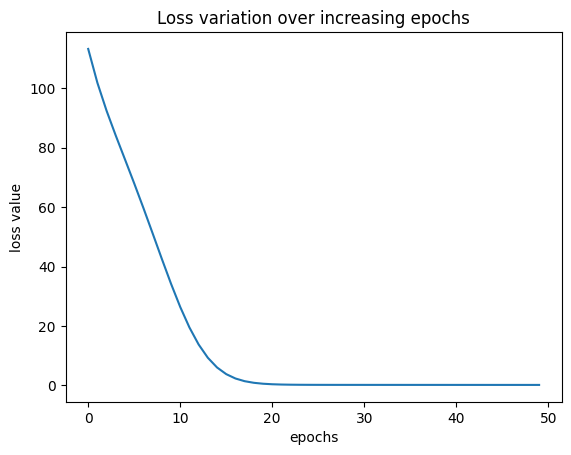

In [ ]:
plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## Dataset and dataloader

Data loader is responsible for providing a means of loading data from a dataset and preparing it for model training. It can divide data into batches and perform operations such as shuffling and loading data in parallel.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

Three main things to remember

1) Inherit from the Dataset class and implement the init method

2) Implement the __getitem__ method (whatever this method returns is what we get when we create a dataloader)

3) Implement the __len__ method
These 3 functions are a necessity, there is also a collate_fn which I will cover in future lessons

In [ ]:
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x).float().to(device)
    self.y = torch.tensor(y).float().to(device)
  def __len__(self):
    return len(self.x)
  def __getitem__(self,ix):
    return self.x[ix], self.y[ix]

In [ ]:
ds = MyDataset(x,y)

In [ ]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [ ]:
for x,y in dl:
  print(x,y)

tensor([[1., 2.],
        [3., 4.]]) tensor([[3.],
        [7.]])
tensor([[7., 8.],
        [5., 6.]]) tensor([[15.],
        [11.]])


## Using the DataLoader object in the training code makes training much faster as batch processing occurs

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD

In [ ]:
class MyNeuralNet(nn.Module):
   def __init__(self):
     # When calling the super().__init__() method, we guarantee that we are inheriting
     super().__init__()
     self.layer1 = nn.Linear(2,8) # A linear layer
     self.activation = nn.ReLU() # Activation function
     self.layer2 = nn.Linear(8,1)

   # When we pass something through the model object, it calls the forward function
   def forward(self,x):
     x = self.layer1(x)
     x = self.activation(x)
     x = self.layer2(x)
     return x

In [ ]:
model = MyNeuralNet()
loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr = 0.001)

In [ ]:
losses = []
for _ in range(50): # Running for 50 epochs
   for data in dl:
     opt.zero_grad() # Zeroing gradients before each epoch
     x1, y1 = date
     loss_value = loss_func(model(x1),y1)
     # The gradients of the loss function with respect to all trainable parameters of the network are calculated and stored in the grad attribute of the corresponding tensors.
     loss_value.backward()

     # opt.step() is used to update the weights and biases of the neural network using the calculated gradients and the chosen optimization algorithm
     opt.step()
     losses.append(loss_value.detach().numpy())

# Section 4: Neural networks in images

In image classification, the neural network takes an image as input, and produces a probability distribution of classes as output, with the class with the most probability being chosen as the answer.

A neural network widely used in the imaging industry is the convolutional neural network, which uses a filter to extract information from images, as well as using the convolution process to arrive at an answer.

In [ ]:
!wget https://i.scdn.co/image/ab6761610000e5eb31f6ab67e6025de876475814

--2023-12-21 14:36:29--  https://i.scdn.co/image/ab6761610000e5eb31f6ab67e6025de876475814
Resolving i.scdn.co (i.scdn.co)... 146.75.94.248, 2a04:4e42:87::760
Connecting to i.scdn.co (i.scdn.co)|146.75.94.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99347 (97K) [image/jpeg]
Saving to: ‘ab6761610000e5eb31f6ab67e6025de876475814’

ab6761610000e5eb31f 100%[===================>]  97.02K  --.-KB/s    in 0.02s   

2023-12-21 14:36:29 (5.12 MB/s) - ‘ab6761610000e5eb31f6ab67e6025de876475814’ saved [99347/99347]



Reading images using OpenCV

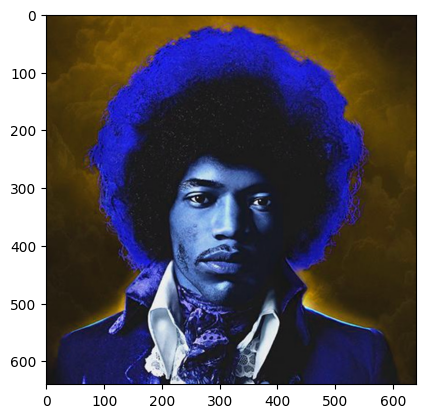

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv.imread('ab6761610000e5eb31f6ab67e6025de876475814')

plt.imshow(img)

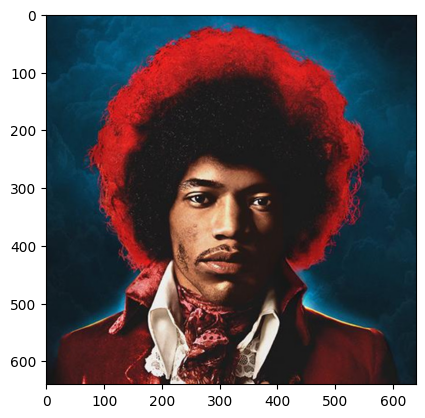

In [ ]:
rgb_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

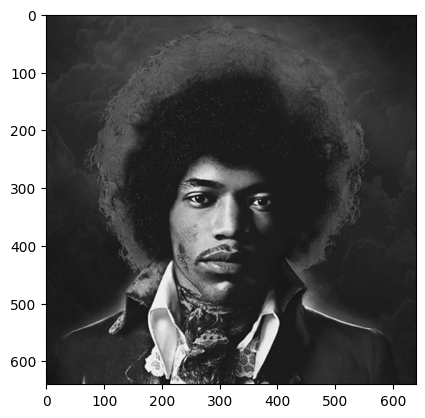

In [ ]:
gray_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')

In [ ]:
rgb_image.shape

(640, 640, 3)

In [ ]:
gray_image.shape

Resizing

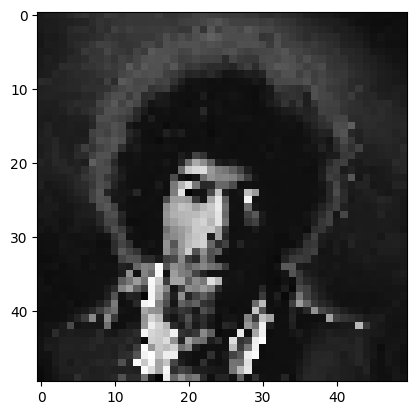

In [ ]:
img_gray_small = cv.resize(gray_image,(50,50))
plt.imshow(img_gray_small, cmap='gray')

In [ ]:
img_gray_small.shape

(50, 50)

Cropping

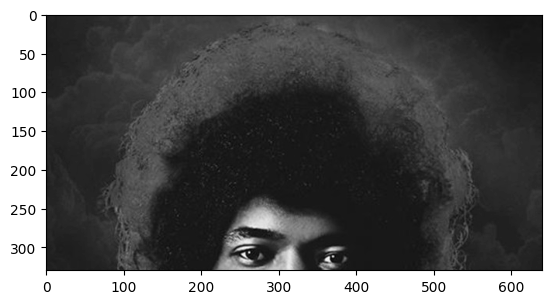

In [ ]:
plt.imshow(gray_image[10:340,:], cmap='gray')

## FMNIST Dataset

In [ ]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True,train=True)

In [ ]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

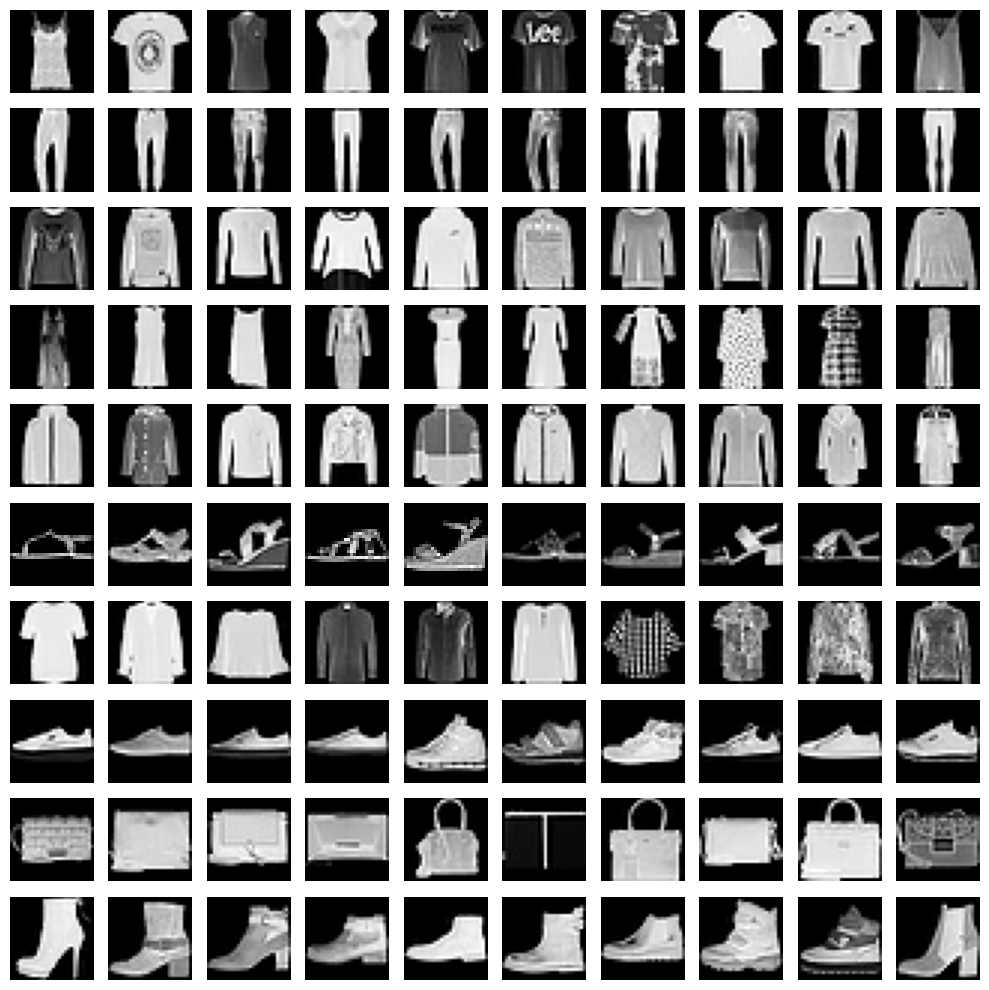

In [ ]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
  label_x_rows = np.where(tr_targets == label_class)[0]
  for plot_cell in plot_row:
    plot_cell.grid(False); plot_cell.axis('off')
    ix = np.random.choice(label_x_rows)
    x, y = tr_images[ix], tr_targets[ix]
    plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

Images to tensor

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision import datasets

In [ ]:
class FMNISTDataset(Dataset):
  def __init__(self,x,y):
    x = x.float()
    x = x.view(-1,28*28)
    self.x, self.y = x,y
  def __getitem__(self,idx):
    x,y = self.x[idx], self.y[idx]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)

In [ ]:
def get_data():
  train = FMNISTDataset(tr_images, tr_targets)
  trn_dl = DataLoader(train, batch_size=32, shuffle=True)
  return trn_dl

Training model

In [ ]:
from torch.optim import SGD
def get_model():
  model = nn.Sequential(
      nn.Linear(28 * 28, 1000),
      nn.ReLU(),
      nn.Linear(1000, 10)
      ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(), lr=1e-2)
  return model, loss_fn, optimizer

In [ ]:
@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  max_values, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


<ipython-input-34-59e3f492da8e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


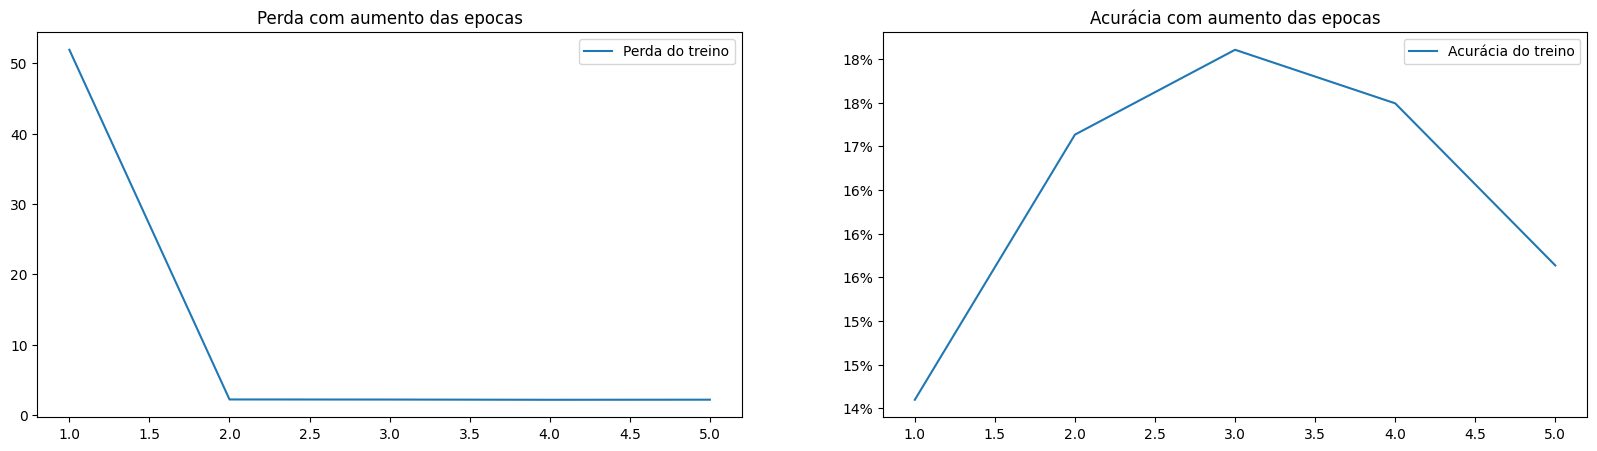

In [ ]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss with increasing seasons')
plt.plot(epochs, losses, label='Training loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy with increasing epochs')
plt.plot(epochs, accuracies, label='Training accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

## Tuning hyperparameters

They affect how the model learns from data. Examples of hyperparameters: learning rate, number of layers, number of neurons, etc.

## Deep Neural Network

In [ ]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2 layers

In [ ]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,28*28)/255
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [ ]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()
def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [ ]:
@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [ ]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


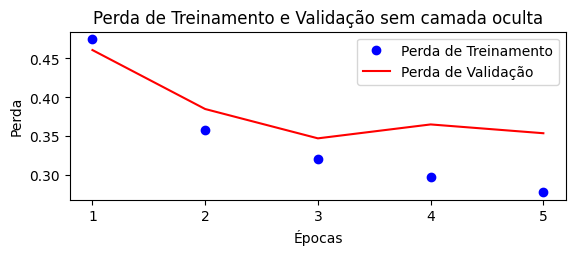

<ipython-input-46-38362020d4b3>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


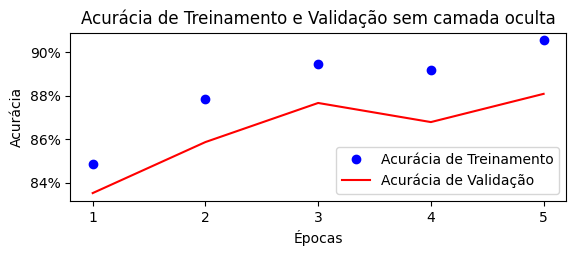

In [ ]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

#Graph 1: Loss of Training and Validation
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Loss of Training and Validation without hidden layer')
plt.xlabel('Seasons')
plt.ylabel('Loss')
plt.legend()
plt.grid(False) # Disables the grid
plt.show()

# Graph 2: Training and Validation Accuracy
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and Validation Accuracy without hidden layer')
plt.xlabel('Seasons')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid(False) # Disables the grid
plt.show()

## Normalization

The act of adjusting the dataset values in a range, normally from 0 to 1, or from -1 to 1. This can help with computer vision problems by increasing accuracy, removing biases and inconsistencies in the data

Why normalize images:

* Remove glare from images
* Remove bias in very dark or very light images
* Improves model convergence

# Section 5: Convolutional Neural Networks

When the input is an image, dense neural networks can demonstrate a certain slowness and difficulty due to the large number of weights and biases. The convolutional neural network (CNN) takes advantage of the convolution process and other techniques to solve these problems and even increase accuracy.

## Implementation

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'


X_train = torch.tensor([[[[4, 5, 6, 7], [5, 6, 7, 8], [8, 9, 10, 11], [4, 6, 7, 8]]], [[[-4, 5, 6, -7], [5, -6, 7, 8], [-8, 9, -10, 11], [-4, -6, -7, -8]]]]).float().to(device)
X_train.div_(8)
y_train = torch.tensor([0, 1]).float().to(device)

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

def get_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(1,1),
        nn.Sigmoid()
    ).to(device)

    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.01)

    return model, loss_fn, optimizer

In [ ]:
model, criterion, optimizer = get_model()
model

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
import torch

def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction.squeeze(), y.squeeze())
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [ ]:
from torch.utils.data import TensorDataset, Dataset, DataLoader

trn_dl = DataLoader(TensorDataset(X_train, y_train))

In [ ]:
import torch

for epoch in range(2000):
    for ix, batch in enumerate(trn_dl):
        x, y = batch
        x = x.to(device)
        y = y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, criterion)


In [ ]:
model(X_train[:1])

tensor([[0.0032]], grad_fn=<SigmoidBackward0>)

## Data augmentation

Applying random rotations, cropping, and rotating the image can generate different variations of the same image, thus increasing the size of the dataset.

In [ ]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '/content/' # This can be any directory
# you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder,
                               download=True,
                               train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder,
                                   download=True,
                                   train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

100%|██████████| 26421880/26421880 [00:01<00:00, 19558006.79it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334370.20it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6145969.99it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6185126.61it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
    iaa.Affine(translate_px={'x':(-10,10)},
        mode='constant'),
])

In [ ]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y, aug=None):
        self.x, self.y = x, y
        self.aug = aug
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    def __len__(self): return len(self.x)

    def collate_fn(self, batch):
        'logic to modify a batch of images'
        ims, classes = list(zip(*batch))
        if self.aug:
          ims_np = np.array([tensor.numpy() for tensor in ims])
          ims=self.aug.augment_images(images=ims_np)


        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims, classes

In [ ]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(64, 128, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(3200, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=64,
                collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
for epoch in range(5):
    print(epoch)
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)

0
1
2
3
4


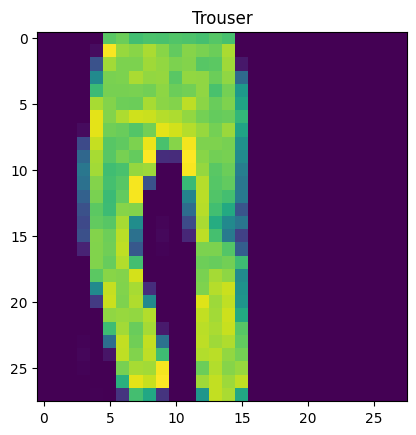

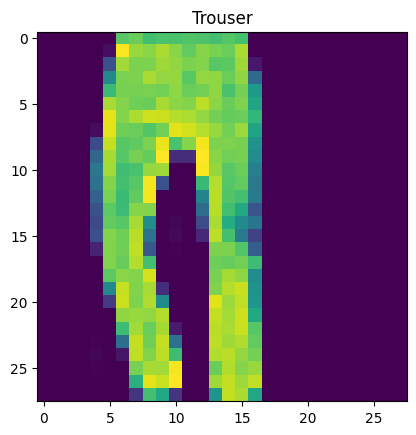

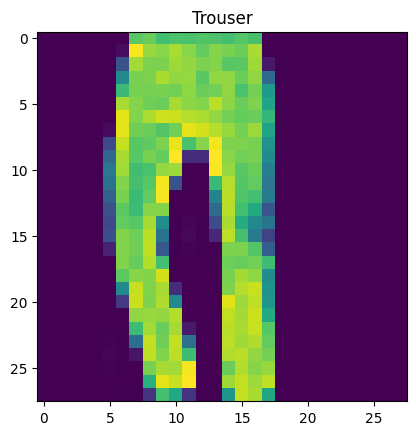

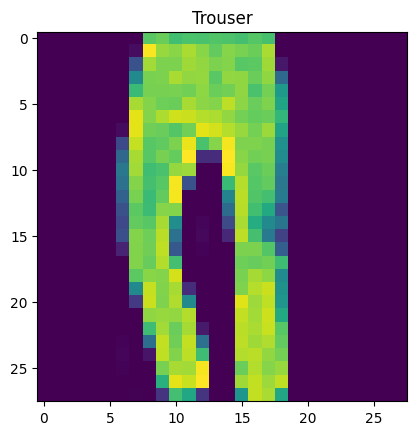

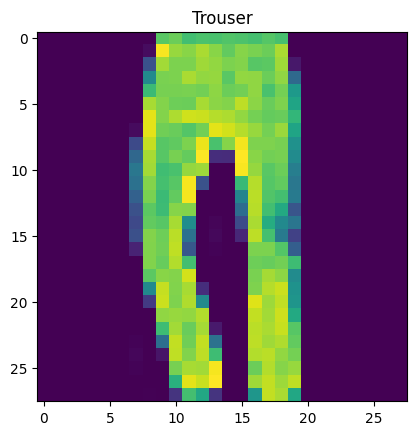

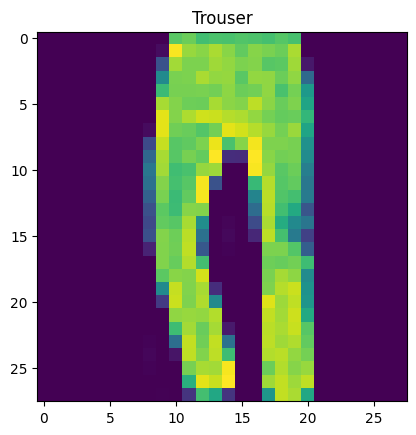

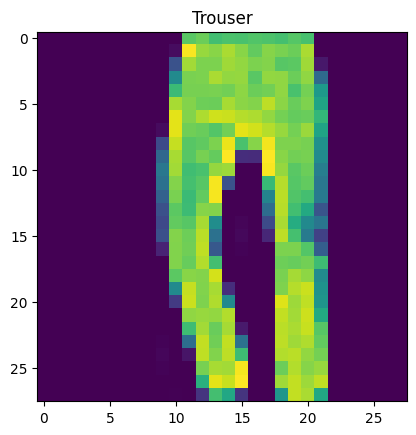

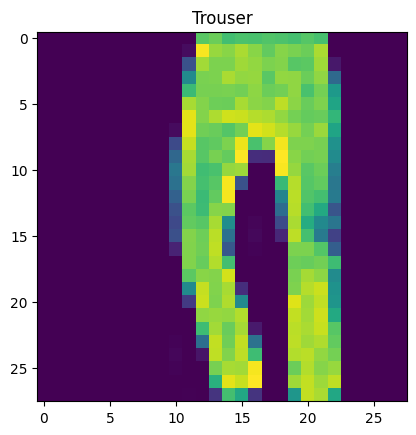

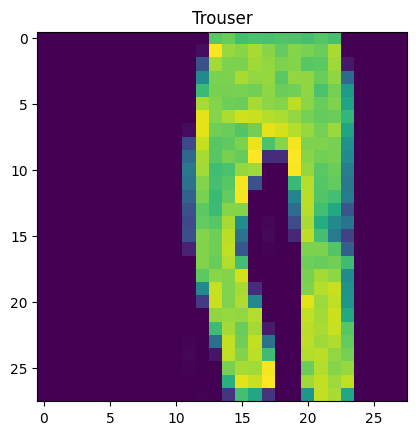

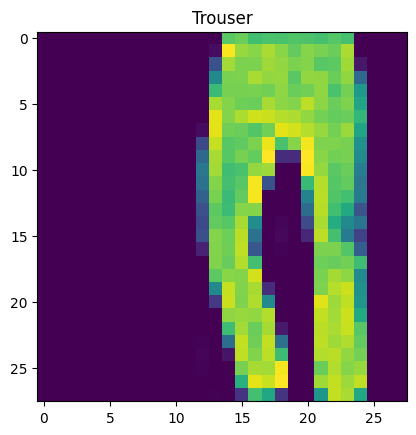

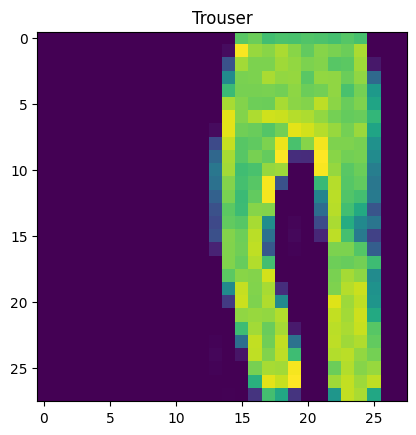

In [ ]:
preds = []
ix = 24300
for px in range(-5,6):
    img = tr_images[ix]/255.
    img = img.view(28, 28)
    img2 = np.roll(img, px, axis=1)
    img3 = torch.Tensor(img2).view(-1,1,28,28).to(device)
    np_output = model(img3).cpu().detach().numpy()
    pred = np.exp(np_output)/np.sum(np.exp(np_output))
    preds.append(pred)
    plt.imshow(img2)
    plt.title(fmnist.classes[pred[0].argmax()])
    plt.show()

# Section 6: Auto Encoders

Types of neural networks that learn to encode and decode, among other things.

The encoder takes as input an image and reduces its dimensional representation, called latent space.

From latent space, the decoder reconstructs the image.

Auto encoders are used in image compression, noise removal and data generation.

Benefits:

* Unsupervised learning;
* Represent complex data in low dimensionality;
* Data compression to reduce space for large datasets.

In [ ]:
!pip install -q torch_snippets
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.2 MB/s eta 0

In [ ]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [ ]:
trn_ds = MNIST('/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('/content/', transform=img_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 131401543.75it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31835924.79it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 85045393.47it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18247632.92it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
batch_size = 256
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latend_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), nn.ReLU(True),
            nn.Linear(128, 64), nn.ReLU(True),
            #nn.Linear(64, 12),  nn.ReLU(True),
            nn.Linear(64, latent_dim))
        self.decoder = nn.Sequential(
            #nn.Linear(latent_dim, 12), nn.ReLU(True),
            nn.Linear(latent_dim, 64), nn.ReLU(True),
            nn.Linear(64, 128), nn.ReLU(True),
            nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x

In [ ]:
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

EPOCH: 1.000  val_loss: 0.203  trn_loss: 0.267  (37.16s - 148.65s remaining)
EPOCH: 2.000  val_loss: 0.169  trn_loss: 0.185  (54.56s - 81.84s remaining)
EPOCH: 3.000  val_loss: 0.156  trn_loss: 0.162  (72.13s - 48.08s remaining)
EPOCH: 4.000  val_loss: 0.150  trn_loss: 0.153  (90.69s - 22.67s remaining)
EPOCH: 5.000  val_loss: 0.147  trn_loss: 0.149  (108.48s - 0.00s remaining)


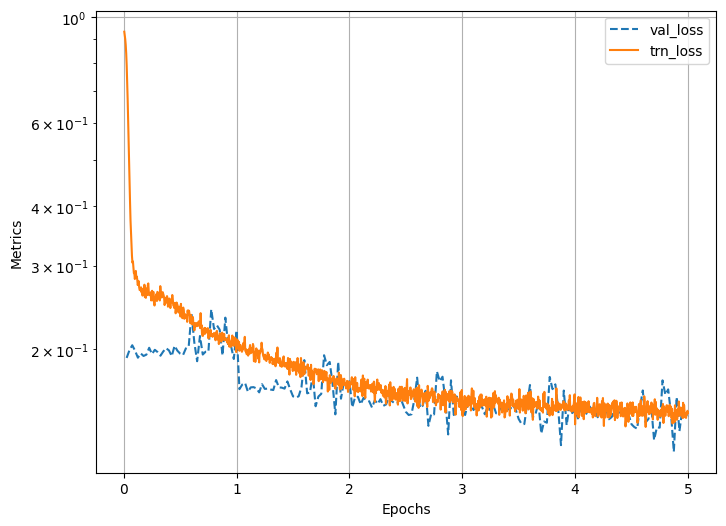

In [ ]:
model = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
    log.report_avgs(epoch+1)
log.plot(log=True)

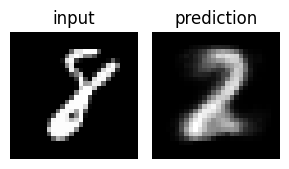

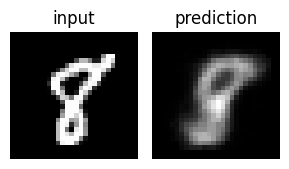

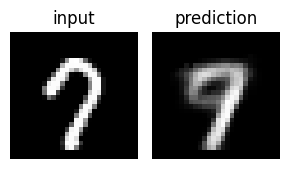

In [ ]:

for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1,2,figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

EPOCH: 1.000  val_loss: 0.131  trn_loss: 0.227  (21.13s - 84.51s remaining)
EPOCH: 2.000  val_loss: 0.094  trn_loss: 0.109  (38.74s - 58.12s remaining)
EPOCH: 3.000  val_loss: 0.078  trn_loss: 0.086  (57.20s - 38.14s remaining)
EPOCH: 4.000  val_loss: 0.068  trn_loss: 0.074  (75.41s - 18.85s remaining)
EPOCH: 5.000  val_loss: 0.061  trn_loss: 0.066  (93.38s - 0.00s remaining)


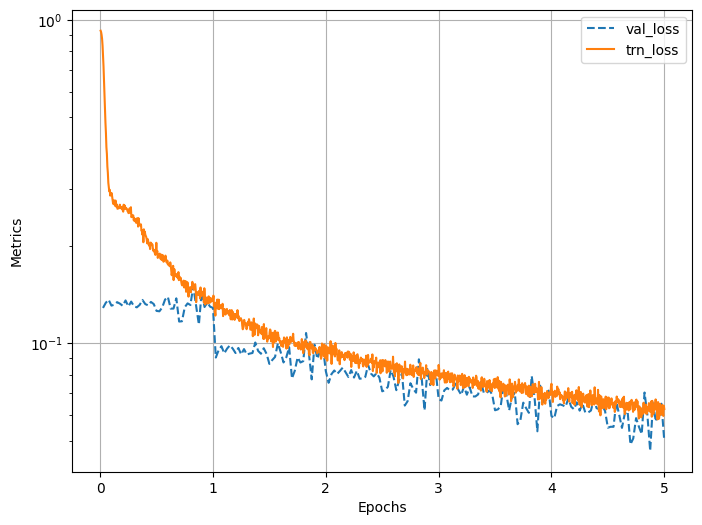

EPOCH: 1.000  val_loss: 0.216  trn_loss: 0.269  (18.45s - 73.81s remaining)
EPOCH: 2.000  val_loss: 0.191  trn_loss: 0.202  (35.99s - 53.98s remaining)
EPOCH: 3.000  val_loss: 0.179  trn_loss: 0.183  (54.39s - 36.26s remaining)
EPOCH: 4.000  val_loss: 0.173  trn_loss: 0.175  (72.74s - 18.19s remaining)
EPOCH: 5.000  val_loss: 0.169  trn_loss: 0.171  (90.85s - 0.00s remaining)


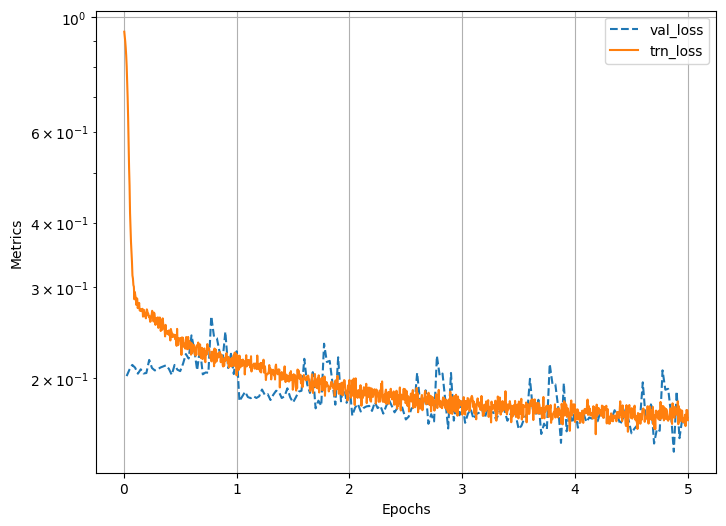

EPOCH: 1.000  val_loss: 0.194  trn_loss: 0.257  (19.97s - 79.87s remaining)
EPOCH: 2.000  val_loss: 0.167  trn_loss: 0.179  (37.44s - 56.17s remaining)
EPOCH: 3.000  val_loss: 0.156  trn_loss: 0.161  (55.81s - 37.21s remaining)
EPOCH: 4.000  val_loss: 0.150  trn_loss: 0.154  (74.18s - 18.55s remaining)
EPOCH: 5.000  val_loss: 0.147  trn_loss: 0.150  (92.18s - 0.00s remaining)


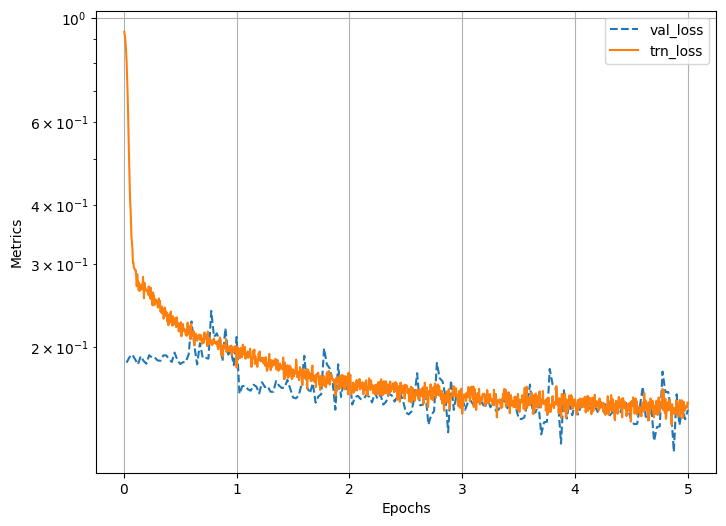

EPOCH: 1.000  val_loss: 0.166  trn_loss: 0.250  (18.36s - 73.44s remaining)
EPOCH: 2.000  val_loss: 0.139  trn_loss: 0.150  (36.07s - 54.11s remaining)
EPOCH: 3.000  val_loss: 0.129  trn_loss: 0.134  (54.61s - 36.41s remaining)
EPOCH: 4.000  val_loss: 0.124  trn_loss: 0.126  (72.63s - 18.16s remaining)
EPOCH: 5.000  val_loss: 0.120  trn_loss: 0.122  (90.55s - 0.00s remaining)


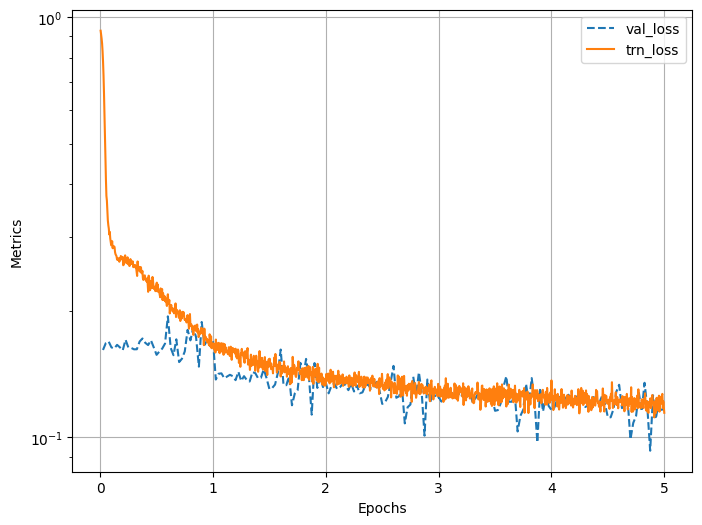

EPOCH: 1.000  val_loss: 0.158  trn_loss: 0.253  (18.57s - 74.26s remaining)
EPOCH: 2.000  val_loss: 0.117  trn_loss: 0.133  (36.24s - 54.35s remaining)
EPOCH: 3.000  val_loss: 0.100  trn_loss: 0.108  (54.57s - 36.38s remaining)
EPOCH: 4.000  val_loss: 0.093  trn_loss: 0.098  (72.92s - 18.23s remaining)
EPOCH: 5.000  val_loss: 0.090  trn_loss: 0.093  (90.99s - 0.00s remaining)


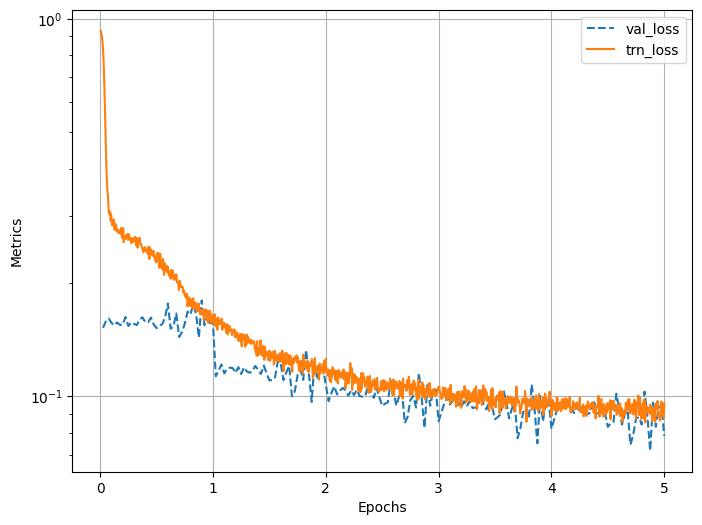

In [ ]:
def train_aec(latent_dim):
    model = AutoEncoder(latent_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

    num_epochs = 5
    log = Report(num_epochs)

    for epoch in range(num_epochs):
        N = len(trn_dl)
        for ix, (data, _) in enumerate(trn_dl):
            loss = train_batch(data, model, criterion, optimizer)
            log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

        N = len(val_dl)
        for ix, (data, _) in enumerate(val_dl):
            loss = validate_batch(data, model, criterion)
            log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        log.report_avgs(epoch+1)
    log.plot(log=True)
    return model

aecs = [train_aec(dim) for dim in [50, 2, 3, 5, 10]]

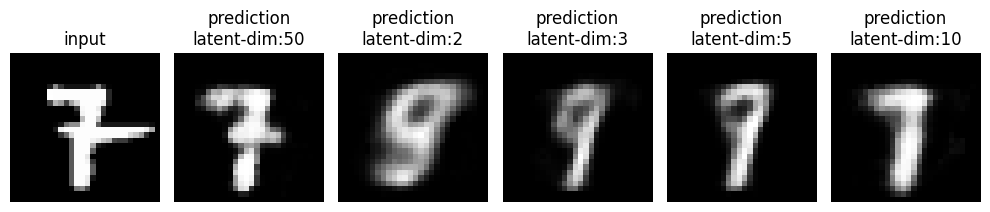

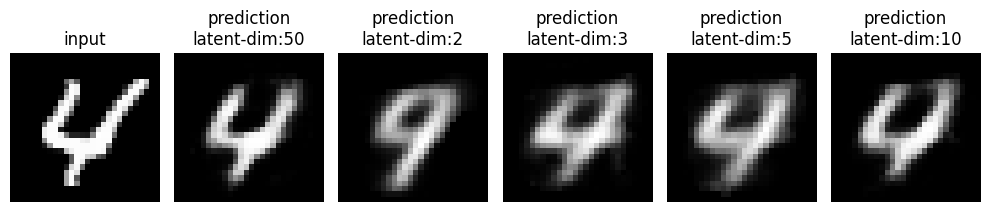

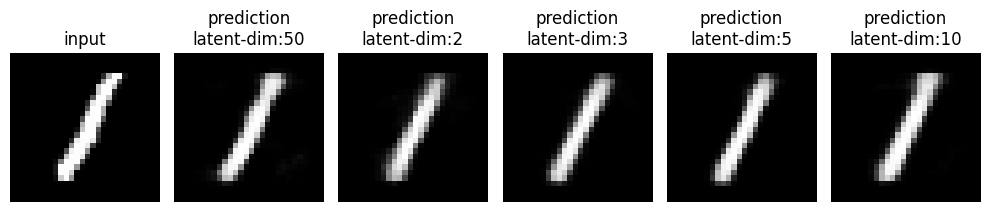

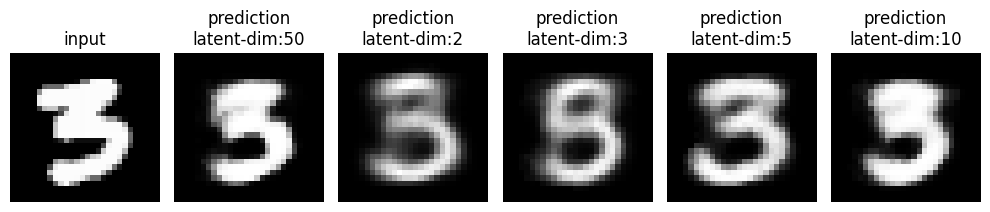

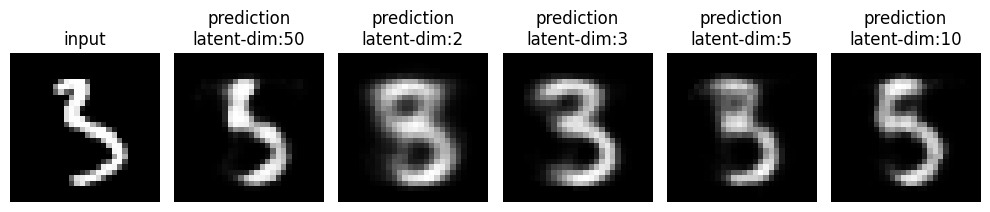

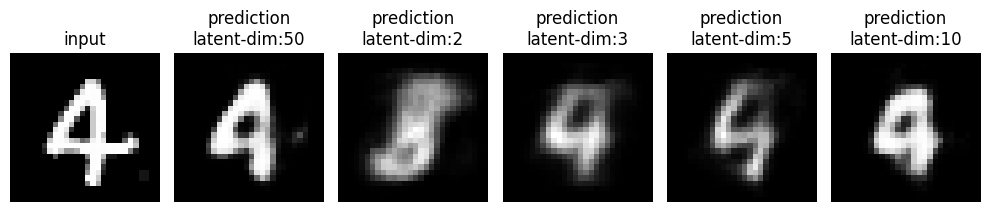

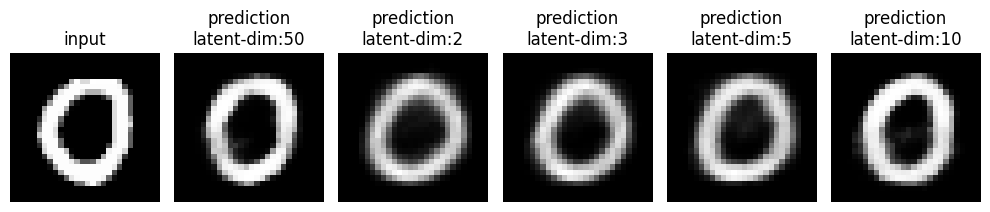

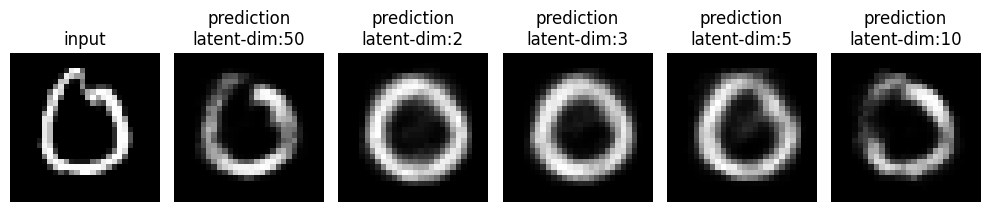

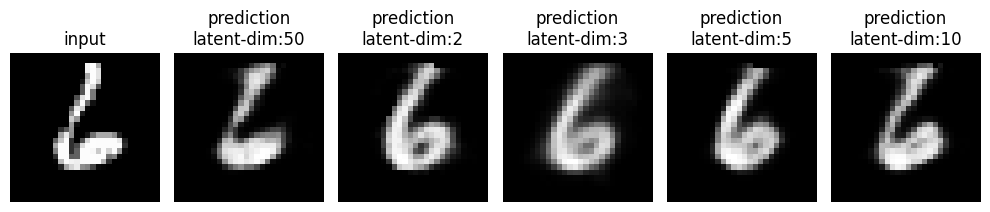

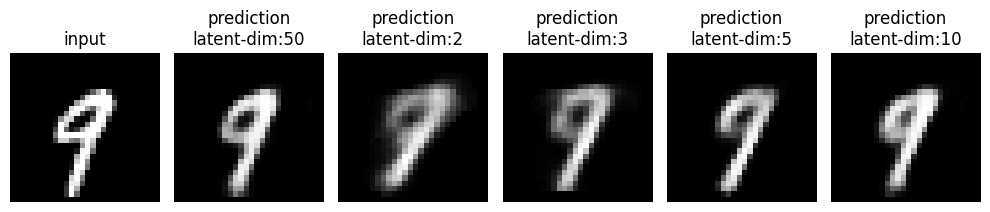

In [ ]:
for _ in range(10):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    fig, ax = plt.subplots(1, len(aecs)+1, figsize=(10,4))
    ax = iter(ax.flat)
    show(im[0], ax=next(ax), title='input')
    for model in aecs:
        _im = model(im[None])[0]
        show(_im[0], ax=next(ax), title=f'prediction\nlatent-dim:{model.latend_dim}')
    plt.tight_layout()
    plt.show()

## CNN based on Auto Encoder

In [ ]:
!pip install -q torch_snippets
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

trn_ds = MNIST('/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('/content/', transform=img_transform, train=False, download=True)

batch_size = 128
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [ ]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1), nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1), nn.Tanh()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = ConvAutoEncoder().to(device)
!pip install torch_summary
from torchsummary import summary
summary(model, torch.zeros(2,1,28,28));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 2, 2]            --
|    └─Conv2d: 2-1                       [-1, 32, 10, 10]          320
|    └─ReLU: 2-2                         [-1, 32, 10, 10]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 5, 5]            --
|    └─Conv2d: 2-4                       [-1, 64, 3, 3]            18,496
|    └─ReLU: 2-5                         [-1, 64, 3, 3]            --
|    └─MaxPool2d: 2-6                    [-1, 64, 2, 2]            --
├─Sequential: 1-2                        [-1, 1, 28, 28]           --
|    └─ConvTranspose2d: 2-7              [-1, 32, 5, 5]            18,464
|    └─ReLU: 2-8                         [-1, 32, 5, 5]            --
|    └─ConvTranspose2d: 2-9              [-1, 16, 15, 15]          12,816
|    └─ReLU: 2-10                        [-1, 16, 15, 15]          --
|    └─ConvTranspose2d: 2-11             [-1, 1, 28, 28]           65
| 

In [ ]:
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

In [ ]:
@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

In [ ]:
model = ConvAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')

    log.report_avgs(epoch+1)

EPOCH: 1.000  val_loss: 0.111  trn_loss: 0.251  (55.90s - 223.62s remaining)
EPOCH: 2.000  val_loss: 0.079  trn_loss: 0.094  (90.59s - 135.88s remaining)
EPOCH: 3.000  val_loss: 0.068  trn_loss: 0.075  (126.05s - 84.03s remaining)
EPOCH: 4.000  val_loss: 0.062  trn_loss: 0.067  (162.87s - 40.72s remaining)
EPOCH: 5.000  val_loss: 0.058  trn_loss: 0.062  (197.97s - 0.00s remaining)


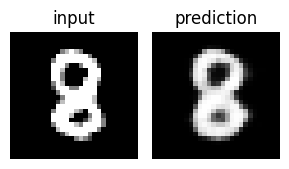

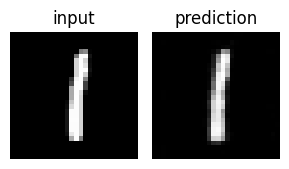

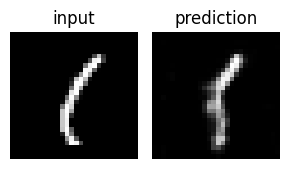

In [ ]:
for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()


In [ ]:
latent_vectors = []
classes = []

In [ ]:
for im,clss in val_dl:
    latent_vectors.append(model.encoder(im).view(len(im),-1))
    classes.extend(clss)

In [ ]:
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [ ]:
clustered = tsne.fit_transform(latent_vectors)

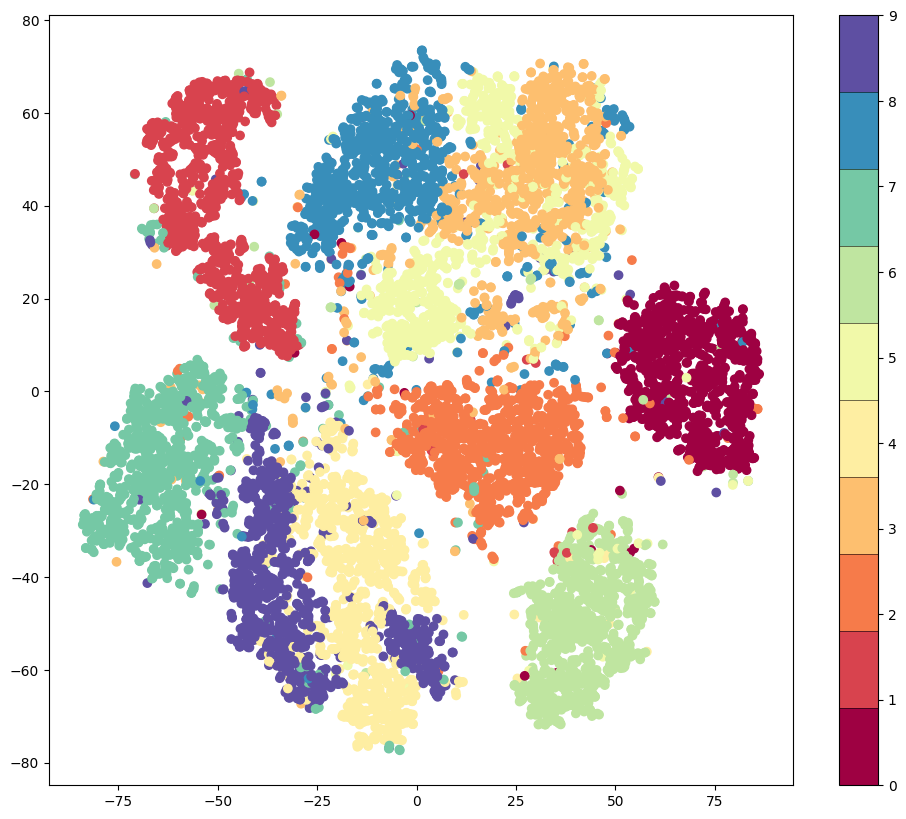

In [ ]:
fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustered), c=classes, cmap=cmap)
plt.colorbar(drawedges=True)

In [ ]:
latent_vectors = []
classes = []
for im,clss in val_dl:
    latent_vectors.append(model.encoder(im))
    classes.extend(clss)
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy().reshape(10000, -1)

In [ ]:
rand_vectors = []
for col in latent_vectors.transpose(1,0):
    mu, sigma = col.mean(), col.std()
    rand_vectors.append(sigma*torch.randn(1,100) + mu)

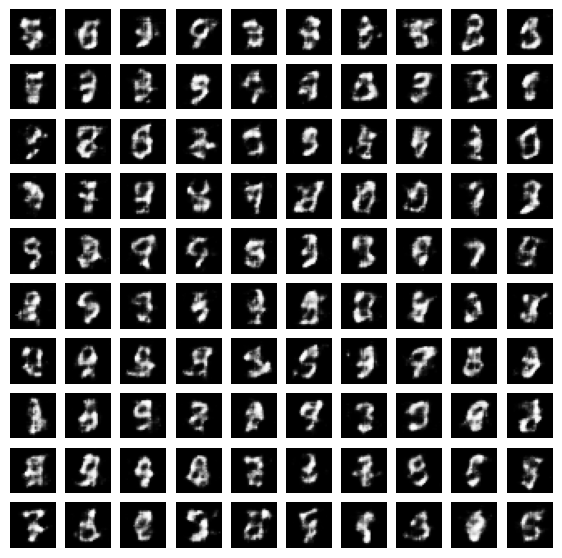

In [ ]:
rand_vectors = torch.cat(rand_vectors).transpose(1,0).to(device)
fig, ax = plt.subplots(10,10,figsize=(7,7)); ax = iter(ax.flat)
for p in rand_vectors:
    img = model.decoder(p.reshape(1,64,2,2)).view(28,28)
    show(img, ax=next(ax))

## Variational autoencoder (VAE)

It incorporates Bayesian inference into the learning process, where the encoder generates a mean vector and a variance vector, which are used to generate samples of latent variables.

VAE produces reconstructions that look more natural than autoencoders because it can take samples from the learned distribution to generate new examples.

In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu<version>/torch_stable.html

/bin/bash: line 1: version: No such file or directory


In [ ]:
!pip install -q torch_snippets
from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_dataset = datasets.MNIST(root='MNIST/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='MNIST/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder network
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc21 = nn.Linear(256, 20)  # mu
        self.fc22 = nn.Linear(256, 20)  # logvar

        # Decoder network
        self.fc3 = nn.Linear(20, 256)
        self.fc4 = nn.Linear(256, 64 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        mu = self.fc21(x)
        logvar = self.fc22(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = Variable(torch.randn(std.size()))
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 64, 7, 7)
        z = F.relu(self.deconv1(z))
        z = torch.sigmoid(self.deconv2(z))
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        z = self.decode(z)
        return z, mu, logvar


In [ ]:
def train_batch(data, model, optimizer, loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss, mse, kld, log_var.mean(), mean.mean()



@torch.no_grad()
def validate_batch(data, model, loss_function):
    model.eval()
    data = data.to(device)
    recon, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon, data, mean, log_var)
    return loss, mse, kld, log_var.mean(), mean.mean()

In [ ]:
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD

EPOCH: 1.000  train_log_var: -0.530  train_loss: 2780.848  val_log_var: -0.896  val_mean: -0.001  train_kld: 362.204  val_loss: 1923.555  val_recon: 1331.983  train_recon: 2418.644  val_kld: 591.572  train_mean: -0.005  (96.53s - 868.78s remaining)


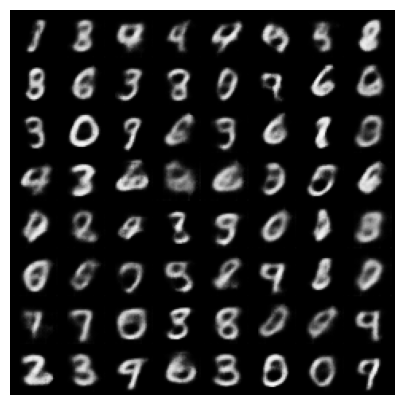

EPOCH: 2.000  train_log_var: -0.971  train_loss: 2063.366  val_log_var: -1.043  val_mean: 0.005  train_kld: 626.586  val_loss: 1686.051  val_recon: 1009.477  train_recon: 1436.780  val_kld: 676.574  train_mean: 0.001  (198.29s - 793.16s remaining)


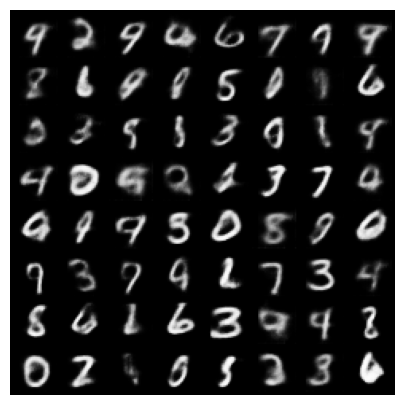

EPOCH: 3.000  train_log_var: -1.058  train_loss: 1939.028  val_log_var: -1.075  val_mean: 0.008  train_kld: 679.759  val_loss: 1598.217  val_recon: 912.534  train_recon: 1259.269  val_kld: 685.683  train_mean: 0.002  (295.89s - 690.41s remaining)


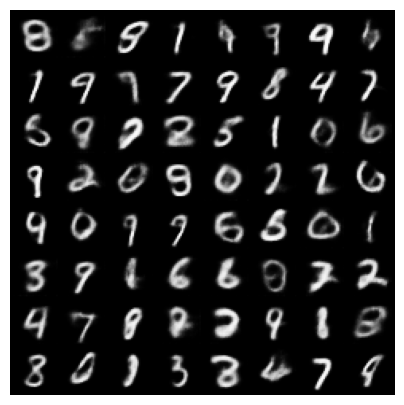

EPOCH: 4.000  train_log_var: -1.092  train_loss: 1887.309  val_log_var: -1.121  val_mean: -0.001  train_kld: 699.838  val_loss: 1588.946  val_recon: 869.928  train_recon: 1187.471  val_kld: 719.017  train_mean: 0.002  (393.55s - 590.33s remaining)


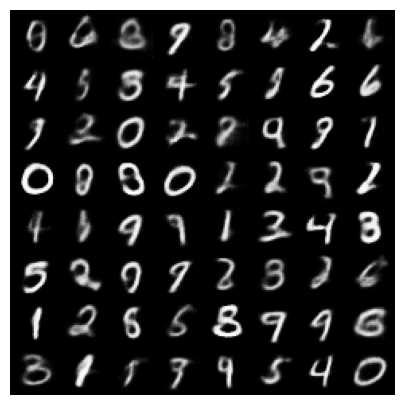

EPOCH: 5.000  train_log_var: -1.113  train_loss: 1858.508  val_log_var: -1.077  val_mean: -0.003  train_kld: 712.671  val_loss: 1511.518  val_recon: 840.307  train_recon: 1145.837  val_kld: 671.211  train_mean: 0.002  (493.43s - 493.43s remaining)


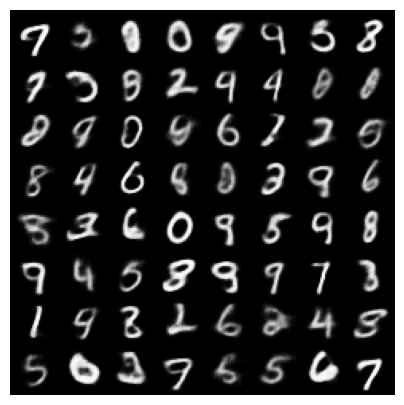

EPOCH: 6.000  train_log_var: -1.125  train_loss: 1838.215  val_log_var: -1.169  val_mean: 0.002  train_kld: 719.529  val_loss: 1554.234  val_recon: 809.024  train_recon: 1118.686  val_kld: 745.210  train_mean: 0.002  (597.50s - 398.33s remaining)


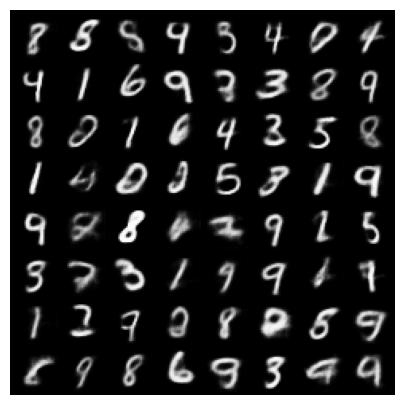

EPOCH: 7.000  train_log_var: -1.132  train_loss: 1820.722  val_log_var: -1.151  val_mean: 0.012  train_kld: 724.386  val_loss: 1532.598  val_recon: 795.701  train_recon: 1096.337  val_kld: 736.897  train_mean: 0.002  (696.82s - 298.64s remaining)


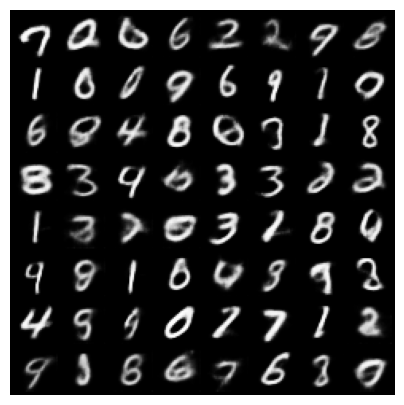

EPOCH: 8.000  train_log_var: -1.143  train_loss: 1809.251  val_log_var: -1.110  val_mean: 0.008  train_kld: 731.460  val_loss: 1493.453  val_recon: 786.634  train_recon: 1077.791  val_kld: 706.819  train_mean: 0.002  (796.59s - 199.15s remaining)


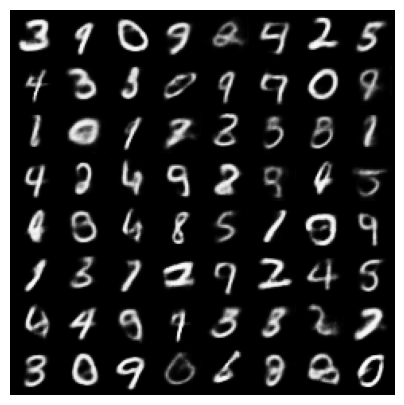

EPOCH: 9.000  train_log_var: -1.148  train_loss: 1798.222  val_log_var: -1.153  val_mean: 0.011  train_kld: 734.895  val_loss: 1506.374  val_recon: 770.725  train_recon: 1063.327  val_kld: 735.649  train_mean: 0.001  (896.08s - 99.56s remaining)


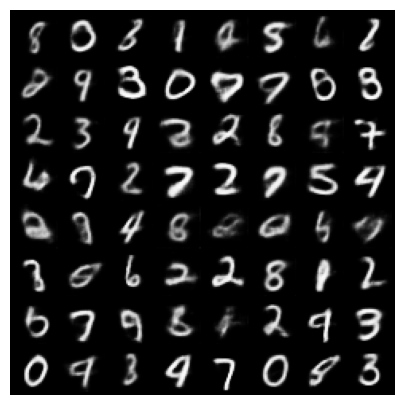

EPOCH: 10.000  train_log_var: -1.150  train_loss: 1787.777  val_log_var: -1.143  val_mean: -0.000  train_kld: 735.529  val_loss: 1487.426  val_recon: 767.056  train_recon: 1052.248  val_kld: 720.371  train_mean: 0.001  (995.06s - 0.00s remaining)


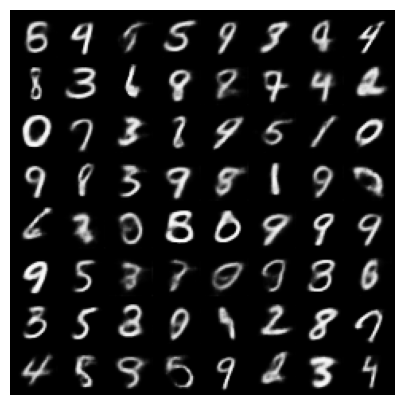

In [ ]:
n_epochs = 10
log = Report(n_epochs)
vae = VAE().to(device)
optimizer = optim.AdamW(vae.parameters(), lr=1e-3)


for epoch in range(n_epochs):
    N = len(train_loader)
    for batch_idx, (data, _) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')

    N = len(test_loader)
    for batch_idx, (data, _) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')

    log.report_avgs(epoch+1)
    with torch.no_grad():
        z = torch.randn(64, 20).to(device)
        sample = vae.decode(z).to(device)
        images = make_grid(sample.view(64, 1, 28, 28)).permute(1,2,0)
        show(images)

# Section 7: Hands-on Projects

Three projects are explored:

* Deep Fake;
* Neural Style Transfer;
* Image Colorization.

## Deepfake

Through advanced algorithms, images and sounds can be created with the aim of, for example, creating a video of a person saying something, where the entire video is created by the algorithm.

In [ ]:
import os
if not os.path.exists('Faceswap-Deepfake-Pytorch'):
    !wget -q https://www.dropbox.com/s/5ji7jl7httso9ny/person_images.zip
    !wget -q https://raw.githubusercontent.com/sizhky/deep-fake-util/main/random_warp.py
    !unzip -q person_images.zip
!pip install -q torch_snippets torch_summary
from torch_snippets import *
from random_warp import get_training_data

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
def crop_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if(len(faces)>0):
        for (x,y,w,h) in faces:
            img2 = img[y:(y+h),x:(x+w),:]
        img2 = cv2.resize(img2,(256,256))
        return img2, True
    else:
        return img, False

In [ ]:
!mkdir cropped_faces_personA
!mkdir cropped_faces_personB

def crop_images(folder):
    images = Glob(folder+'/*.jpg')
    for i in range(len(images)):
        img = read(images[i],1)
        img2, face_detected = crop_face(img)
        if(face_detected==False):
            continue
        else:
            cv2.imwrite('cropped_faces_'+folder+'/'+str(i)+'.jpg',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
crop_images('personA')
crop_images('personB')

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, items_A, items_B):
        self.items_A = np.concatenate([read(f,1)[None] for f in items_A])/255.
        self.items_B = np.concatenate([read(f,1)[None] for f in items_B])/255.
        self.items_A += self.items_B.mean(axis=(0, 1, 2)) - self.items_A.mean(axis=(0, 1, 2))

    def __len__(self):
        return min(len(self.items_A), len(self.items_B))
    def __getitem__(self, ix):
        a, b = choose(self.items_A), choose(self.items_B)
        return a, b

    def collate_fn(self, batch):
        imsA, imsB = list(zip(*batch))
        imsA, targetA = get_training_data(imsA, len(imsA))
        imsB, targetB = get_training_data(imsB, len(imsB))
        imsA, imsB, targetA, targetB = [torch.Tensor(i).permute(0,3,1,2).to(device) for i in [imsA, imsB, targetA, targetB]]
        return imsA, imsB, targetA, targetB

a = ImageDataset(Glob('cropped_faces_personA'), Glob('cropped_faces_personB'))
x = DataLoader(a, batch_size=32, collate_fn=a.collate_fn)

In [ ]:
inspect(*next(iter(x)))

for i in next(iter(x)):
    subplots(i[:8], nc=4, sz=(4,2))

In [ ]:
def _ConvLayer(input_features, output_features):
    return nn.Sequential(
        nn.Conv2d(input_features, output_features, kernel_size=5, stride=2, padding=2),
        nn.LeakyReLU(0.1, inplace=True)
    )

def _UpScale(input_features, output_features):
    return nn.Sequential(
        nn.ConvTranspose2d(input_features, output_features, kernel_size=2, stride=2, padding=0),
        nn.LeakyReLU(0.1, inplace=True)
    )

class Reshape(nn.Module):
    def forward(self, input):
        output = input.view(-1, 1024, 4, 4) # channel * 4 * 4
        return output

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            _ConvLayer(3, 128),
            _ConvLayer(128, 256),
            _ConvLayer(256, 512),
            _ConvLayer(512, 1024),
            nn.Flatten(),
            nn.Linear(1024 * 4 * 4, 1024),
            nn.Linear(1024, 1024 * 4 * 4),
            Reshape(),
            _UpScale(1024, 512),
        )

        self.decoder_A = nn.Sequential(
            _UpScale(512, 256),
            _UpScale(256, 128),
            _UpScale(128, 64),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid(),
        )

        self.decoder_B = nn.Sequential(
            _UpScale(512, 256),
            _UpScale(256, 128),
            _UpScale(128, 64),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x, select='A'):
        if select == 'A':
            out = self.encoder(x)
            out = self.decoder_A(out)
        else:
            out = self.encoder(x)
            out = self.decoder_B(out)
        return out

In [ ]:
def train_batch(model, data, criterion, optimizes):
    optA, optB = optimizers
    optA.zero_grad()
    optB.zero_grad()
    imgA, imgB, targetA, targetB = data
    _imgA, _imgB = model(imgA, 'A'), model(imgB, 'B')

    lossA = criterion(_imgA, targetA)
    lossB = criterion(_imgB, targetB)

    lossA.backward()
    lossB.backward()

    optA.step()
    optB.step()

    return lossA.item(), lossB.item()

In [ ]:
model = Autoencoder().to(device)

dataset = ImageDataset(Glob('cropped_faces_personA'), Glob('cropped_faces_personB'))
dataloader = DataLoader(dataset, 32, collate_fn=dataset.collate_fn)

optimizers = optim.Adam([{'params': model.encoder.parameters()},
                          {'params': model.decoder_A.parameters()}],
                        lr=5e-5, betas=(0.5, 0.999)), \
             optim.Adam([{'params': model.encoder.parameters()},
                          {'params': model.decoder_B.parameters()}],
                        lr=5e-5, betas=(0.5, 0.999))

criterion = nn.L1Loss()

In [ ]:
n_epochs = 10000
log = Report(n_epochs)
!mkdir checkpoint
for ex in range(n_epochs):
    N = len(dataloader)
    for bx,data in enumerate(dataloader):
        lossA, lossB = train_batch(model, data, criterion, optimizers)
        log.record(ex+(1+bx)/N, lossA=lossA, lossB=lossB, end='\r')

    log.report_avgs(ex+1)
    if (ex+1)%100 == 0:
        state = {
                'state': model.state_dict(),
                'epoch': ex
            }
        torch.save(state, './checkpoint/autoencoder.pth')

    if (ex+1)%100 == 0:
        bs = 5
        a,b,A,B = data
        line('A to B')
        _a = model(a[:bs], 'A')
        _b = model(a[:bs], 'B')
        x = torch.cat([A[:bs],_a,_b])
        subplots(x, nc=bs, figsize=(bs*2, 5))

        line('B to A')
        _a = model(b[:bs], 'A')
        _b = model(b[:bs], 'B')
        x = torch.cat([B[:bs],_a,_b])
        subplots(x, nc=bs, figsize=(bs*2, 5))

log.plot_epochs()

## Neural Style Transfer

Method for applying the style of one photo to another, thus creating new photos with better designs and edits.

In [ ]:
!pip install torch_snippets
from torch_snippets import *
from torchvision import transforms as T
from torch.nn import functional as F
from torchvision.models import vgg19
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:

preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.mul_(255))
])
postprocess = T.Compose([
    T.Lambda(lambda x: x.mul_(1./255)),
    T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225]),
])


In [ ]:
class GramMatrix(nn.Module):
    def forward(self, input):
        b,c,h,w = input.size()
        feat = input.view(b, c, h*w)
        G = feat@feat.transpose(1,2)
        G.div_(h*w)
        return G
class GramMSELoss(nn.Module):
    def forward(self, input, target):
        out = F.mse_loss(GramMatrix()(input), target)
        return(out)
class vgg19_modified(nn.Module):
    def __init__(self):
        super().__init__()
        features = list(vgg19(pretrained = True).features)
        self.features = nn.ModuleList(features).eval()
    def forward(self, x, layers=[]):
        order = np.argsort(layers)
        _results, results = [], []
        for ix,model in enumerate(self.features):
            x = model(x)
            if ix in layers: _results.append(x)
        for o in order: results.append(_results[o])
        return results if layers is not [] else x

In [ ]:
vgg = vgg19_modified().to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:09<00:00, 60.3MB/s]


In [ ]:
!wget https://easydrawingguides.com/wp-content/uploads/2016/10/how-to-draw-an-elephant-featured-image-1200-1024x822.png
!wget https://www.neh.gov/sites/default/files/2022-09/Fall_2022_web-images_Picasso_32.jpg

--2023-12-26 15:42:56--  https://easydrawingguides.com/wp-content/uploads/2016/10/how-to-draw-an-elephant-featured-image-1200-1024x822.png
Resolving easydrawingguides.com (easydrawingguides.com)... 104.18.119.61, 104.18.120.61, 2606:4700::6812:773d, ...
Connecting to easydrawingguides.com (easydrawingguides.com)|104.18.119.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217602 (213K) [image/png]
Saving to: ‘how-to-draw-an-elephant-featured-image-1200-1024x822.png’

how-to-draw-an-elep 100%[===================>] 212.50K  --.-KB/s    in 0.03s   

2023-12-26 15:42:56 (7.88 MB/s) - ‘how-to-draw-an-elephant-featured-image-1200-1024x822.png’ saved [217602/217602]

--2023-12-26 15:42:56--  https://www.neh.gov/sites/default/files/2022-09/Fall_2022_web-images_Picasso_32.jpg
Resolving www.neh.gov (www.neh.gov)... 23.21.228.79
Connecting to www.neh.gov (www.neh.gov)|23.21.228.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5309491 (5.1M) [

In [ ]:
imgs = [Image.open(path).resize((512,512)).convert('RGB') for path in ['Fall_2022_web-images_Picasso_32.jpg', 'how-to-draw-an-elephant-featured-image-1200-1024x822.png']]
style_image, content_image = [preprocess(img).to(device)[None] for img in imgs]

In [ ]:
opt_img = content_image.data.clone()
opt_img.requires_grad = True

In [ ]:
style_layers = [0, 5, 10, 19, 28]
content_layers = [21]
loss_layers = style_layers + content_layers

In [ ]:
loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
loss_fns = [loss_fn.to(device) for loss_fn in loss_fns]

In [ ]:
style_weights = [1000/n**2 for n in [64,128,256,512,512]]
content_weights = [1]
weights = style_weights + content_weights

In [ ]:
style_targets = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
content_targets = [A.detach() for A in vgg(content_image, content_layers)]
targets = style_targets + content_targets

In [ ]:
max_iters = 500
optimizer = optim.LBFGS([opt_img])
log = Report(max_iters)

In [ ]:
iters = 0
while iters < max_iters:
    def closure():
        global iters
        iters += 1
        optimizer.zero_grad()
        out = vgg(opt_img, loss_layers)
        layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
        loss = sum(layer_losses)
        loss.backward()
        log.record(pos=iters, loss=loss, end='\r')
        return loss
    optimizer.step(closure)

EPOCH: 502.000  loss: 1161768.375  (7275.79s - -28.99s remaining)

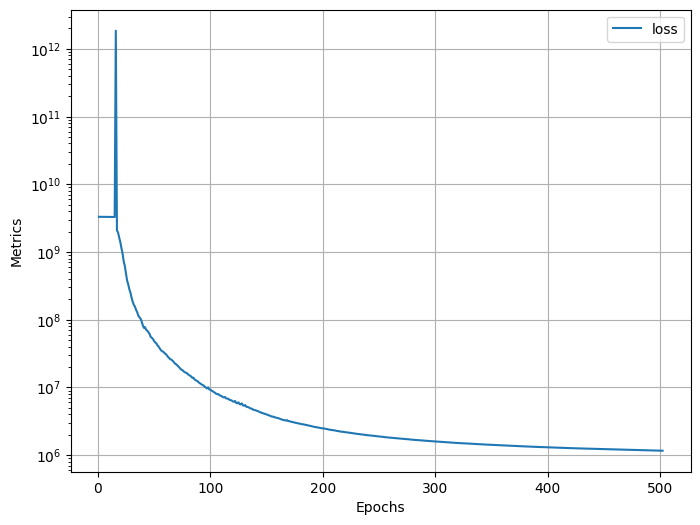

In [ ]:
log.plot(log=True)

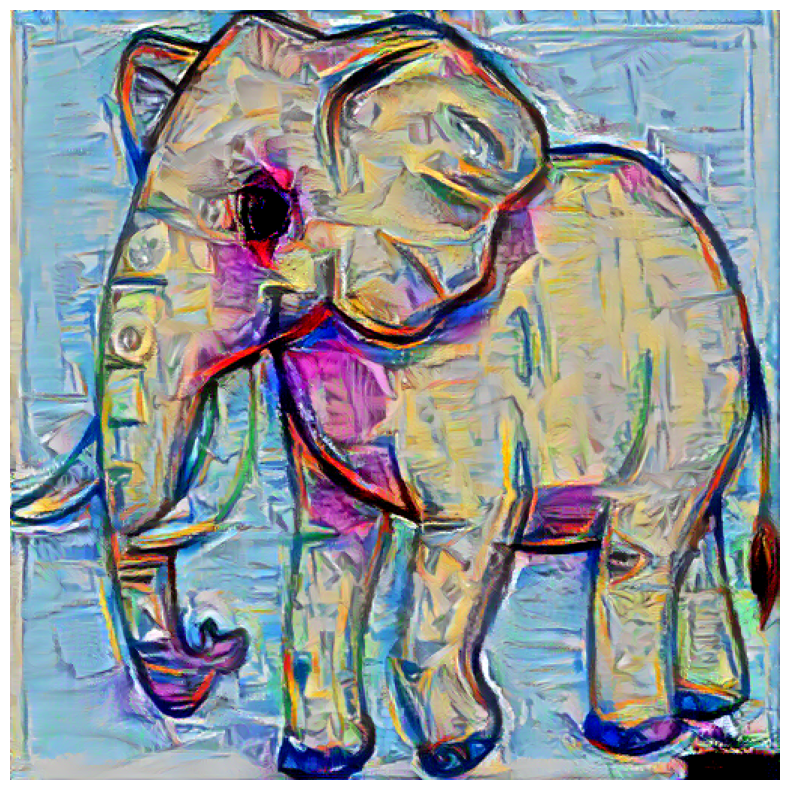

In [ ]:
with torch.no_grad():
    out_img = postprocess(opt_img[0]).permute(1,2,0)
show(out_img)

## Image colorization

Add colors to black and white images.

In [ ]:
!pip install torch_snippets
from torch_snippets import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from torchvision import datasets
import torch
data_folder = '~/cifar10/cifar/'
datasets.CIFAR10(data_folder, download=True)

100%|██████████| 170498071/170498071 [00:01<00:00, 89740518.15it/s] 


Extracting /root/cifar10/cifar/cifar-10-python.tar.gz to /root/cifar10/cifar/


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /root/cifar10/cifar/
    Split: Train

In [ ]:
class Colorize(torchvision.datasets.CIFAR10):
    def __init__(self, root, train):
        super().__init__(root, train)

    def __getitem__(self, ix):
        im, _ = super().__getitem__(ix)
        bw = im.convert('L').convert('RGB')
        bw, im = np.array(bw)/255., np.array(im)/255.
        bw, im = [torch.tensor(i).permute(2,0,1).to(device).float() for i in [bw,im]]
        return bw, im

trn_ds = Colorize('~/cifar10/cifar/', train=True)
val_ds = Colorize('~/cifar10/cifar/', train=False)

trn_dl = DataLoader(trn_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256, shuffle=False)

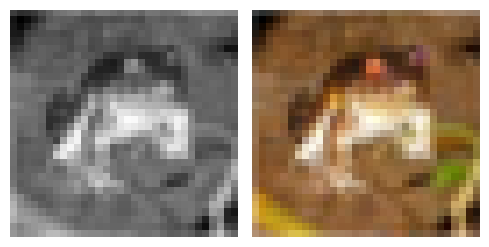

In [ ]:
a,b = trn_ds[0]
subplots([a,b], nc=2)

In [ ]:
class Identity(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return x

class DownConv(nn.Module):
    def __init__(self, ni, no, maxpool=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.MaxPool2d(2) if maxpool else Identity(),
            nn.Conv2d(ni, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(no, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
        )
    def forward(self, x):
        return self.model(x)

class UpConv(nn.Module):
    def __init__(self, ni, no, maxpool=True):
        super().__init__()
        self.convtranspose = nn.ConvTranspose2d(ni, no, 2, stride=2)
        self.convlayers = nn.Sequential(
            nn.Conv2d(no+no, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(no, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
        )

    def forward(self, x, y):
        x = self.convtranspose(x)
        x = torch.cat([x,y], axis=1)
        x = self.convlayers(x)
        return x

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.d1 = DownConv( 3, 64, maxpool=False)
        self.d2 = DownConv( 64, 128)
        self.d3 = DownConv( 128, 256)
        self.d4 = DownConv( 256, 512)
        self.d5 = DownConv( 512, 1024)
        self.u5 = UpConv (1024, 512)
        self.u4 = UpConv ( 512, 256)
        self.u3 = UpConv ( 256, 128)
        self.u2 = UpConv ( 128, 64)
        self.u1 = nn.Conv2d(64, 3, kernel_size=1, stride=1)

    def forward(self, x):
        x0 = self.d1( x) # 32
        x1 = self.d2(x0) # 16
        x2 = self.d3(x1) # 8
        x3 = self.d4(x2) # 4
        x4 = self.d5(x3) # 2
        X4 = self.u5(x4, x3)# 4
        X3 = self.u4(X4, x2)# 8
        X2 = self.u3(X3, x1)# 16
        X1 = self.u2(X2, x0)# 32
        X0 = self.u1(X1) # 3
        return X0

In [ ]:
def get_model():
    model = UNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()
    return model, optimizer, loss_fn

In [ ]:
def train_batch(model, data, optimizer, criterion):
    model.train()
    x, y = data
    _y = model(x)
    optimizer.zero_grad()
    loss = criterion(_y, y)
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    model.eval()
    x, y = data
    _y = model(x)
    loss = criterion(_y, y)
    return loss.item()

EPOCH: 0.250  trn_loss: 0.009  (1736.46s - 692848.18s remaining)

EPOCH: 0.255  trn_loss: 0.009  (1772.30s - 692968.56s remaining)

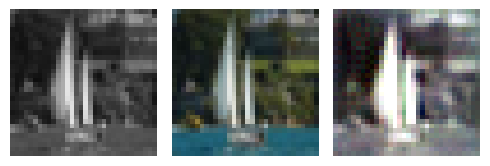

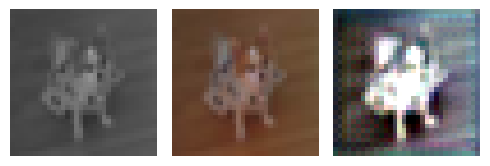

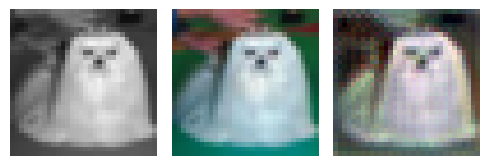

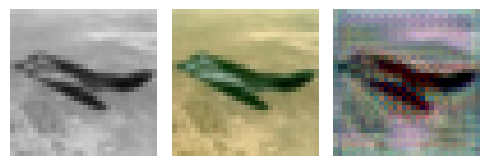

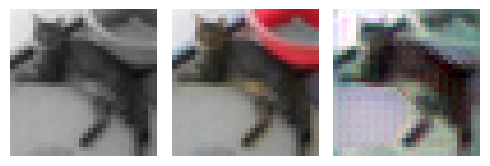

EPOCH: 0.505  trn_loss: 0.007  (3479.44s - 685379.80s remaining)

EPOCH: 0.510  trn_loss: 0.006  (3513.68s - 685166.97s remaining)

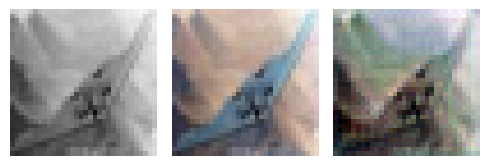

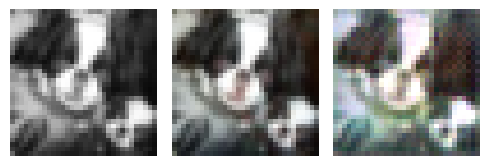

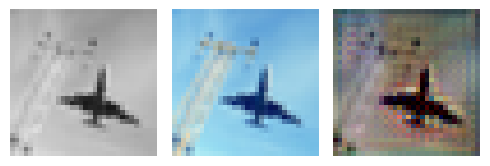

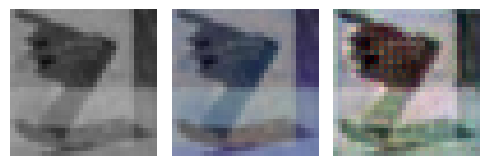

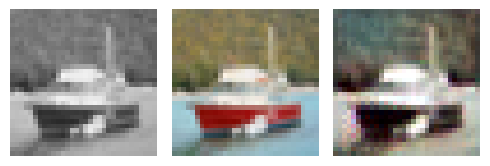

EPOCH: 0.760  trn_loss: 0.007  (5225.53s - 682159.57s remaining)

EPOCH: 0.765  trn_loss: 0.006  (5260.93s - 682167.53s remaining)

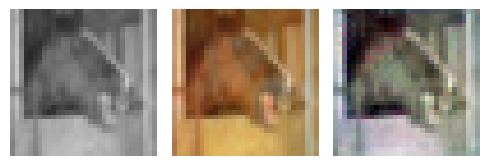

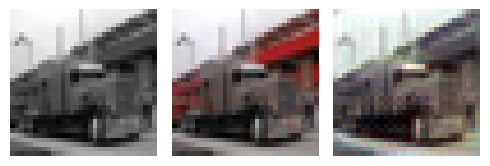

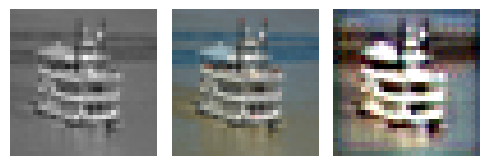

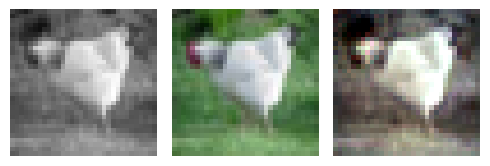

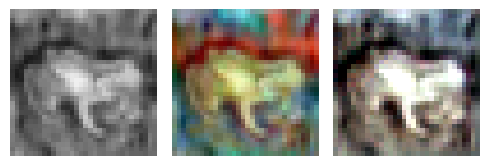

EPOCH: 0.903  trn_loss: 0.007  (6204.43s - 680840.10s remaining)

In [ ]:
model, optimizer, criterion = get_model()
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

_val_dl = DataLoader(val_ds, batch_size=1, shuffle=True)

n_epochs = 100
log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, end='\r')
        if (bx+1)%50 == 0:
            for _ in range(5):
                a,b = next(iter(_val_dl))
                _b = model(a)
                subplots([a[0], b[0], _b[0]], nc=3, figsize=(5,5))

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, end='\r')

    exp_lr_scheduler.step()
    if (ex+1) % 5 == 0: log.report_avgs(ex+1)

    for _ in range(5):
        a,b = next(iter(_val_dl))
        _b = model(a)
        subplots([a[0], b[0], _b[0]], nc=3, figsize=(5,5))

log.plot(log=True)